In [ ]:
import urllib.request
import zipfile
import os

try:
    os.mkdir("files")
except:
    pass

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

# Libraries: Numpy (two weeks)

## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Agenda: Numpy

- Intorduction
- Matrix operations
- Image processing
    - Basic operations
    - Binary segmentation
    - Morphological operators
    - Denoising
    - Ternary segmentation (self-learning)
    - Image gradient
    - Image brightening


## Matrix Operations

## `import` numpy


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import imageio.v2 as imageio

#### Creating new numpy arrays

In [ ]:
# only shape is specified
print(np.zeros((5, 3)))  

In [ ]:
# a defined list of lists
print(np.array([0, 1, 2]))
print([0, 1, 2])

In [ ]:
# like np.array(range(6))
print(np.arange(6))      

In [ ]:
# only shape is specified
print(np.random.random((3, 2))*5+7)            

#### What does the commands do?

In [ ]:
m=np.random.randint(-3, 3, (5,5))
print(m)

#### Find the maximal / minimal value:

In [ ]:
print(np.min(m))
print(np.max(m))  

#### Find the average / median value:

In [ ]:
print(np.mean(m))
print(np.median(m))

#### Stacking/appending matrices vertically (add rows)

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8,9],[1,1,1]])
print(np.vstack((a,b)))

#### Stacking/appending matrices horizontally (add columns)

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[7,8,9],[1,1,1]])
print(np.hstack((a,b)))

Slides 5-6

## Image processing with numpy

slides 7-9

## Grayscale image

### A table of integer values, aka pixels, each in the range of 0..255:
- 0 = Black
- 255 = White


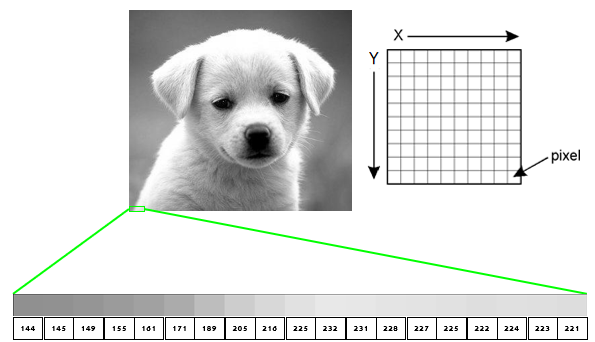


### Examples for image processing tasks

- **Binary segmentation**
    - Pixel>threshold -> white, else black
- **Image gradient**
    - Difference between neighboring pixels
- **Image brightening**
    - Making each pixel brighter
- **Morphological operators** 
    - Erosion – more black, less white
    - Dilation – more white, less black
- **Denoising**
    - recovering a clean image from a noisy one
- **Ternary segmentation**
    - Mapping the whole brightness range to a fixed number of values

### All these tasks can be achieved using matrix operation!

## Image processing - basic operations

#### Reading an image from disk:

In [ ]:
import imageio.v2 as imageio

In [ ]:
im = imageio.imread('files/evil_morty_1.png')
print(im)

print(type(im), im.shape)

#### Creating an “empty”(?) image matrix:

In [ ]:
height=20
width=20

im = np.zeros((height,width), dtype=np.uint8) 


#### <span style='color:red'> Important: each pixel is in the range 0-255 (type np.uint8) </span>

- Numerical operations cause overflow, e.g.: 
    - ```
    np.uint8(200) + np.uint8(100) = 44 = 300 mod 256
    ```


- Therefore, before doing numerical operations on image pixels, convert the whole image or a specific pixel to int 32-bit using np.int_
    - ```
    a = np.uint8(200)  
    b = np.uint8(100)
    np.int_(a) + np.int_(b) = 300
    ```
    

### Image processing – more functions

slides 10-13

## Binary Segmentation

#### Goal: grayscale image $\rightarrow$ black and white image
- pixel > threshold $\rightarrow$ change to white (255)
- pixel <= threshold $\rightarrow$ change to black (0)


#### Motivation: for example, save space


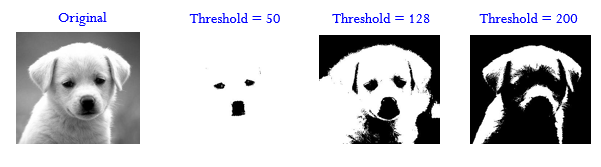

#### Implementation

In [ ]:
im = imageio.imread('files/evil_morty_1.png')

In [ ]:
print(im)

In [ ]:
print(type(im))
print(im.shape, im.dtype)
print(np.min(im), np.max(im))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure()  # opens a new figure window
plt.imshow(im, cmap=plt.cm.gray)

In [ ]:
threshold = 128 #Later we’ll learn how to optimize this threshold

In [ ]:
# find the pixels that are > threshold
over_threshold = im > threshold

# make them white (255)
binary_image = over_threshold * 255

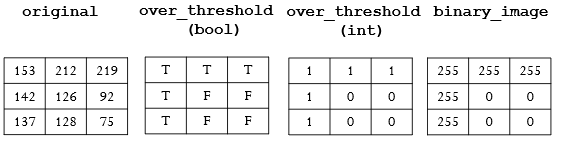

#### Show the binary image

In [ ]:
plt.figure()
plt.imshow(binary_image, cmap=plt.cm.gray)

slides 14-22

## Morph by neighbors
- Morphology is a technique for the analysis and processing of geometrical structures
- Morph-by-neighbors (or, morphological) operators change a pixel according to its neighborhood



|||
|--|--|
|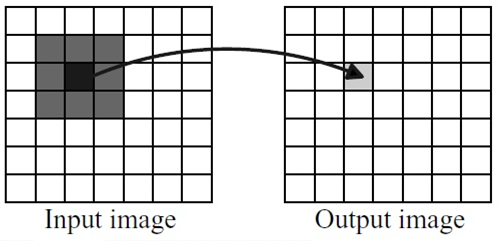|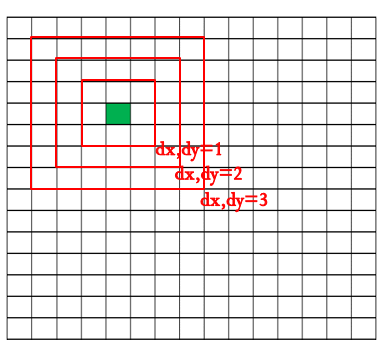
|

### Erosion
- Take **binary image** ; produce **more black, less white**.
    - Edges of white areas (“foreground”) erode away, so black areas (“background”) grow.



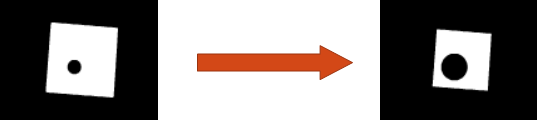

### Dilation – inverse of erosion.
- Boundaries of black areas erode away, so white areas grow.

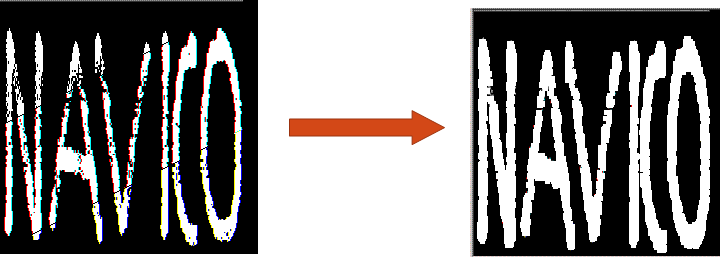

### Implementation

In [ ]:
#Top-down design:
# the "operator" variable is a specific morph function
def morph_by_neighborhood(im, operator, dx=5, dy=5):
    new_im = np.zeros(im.shape)
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            neighborhood = get_neighborhood(im,x,y,dx,dy)
            new_im[x, y] = operator(neighborhood)
    return new_im

In [ ]:
def get_neighborhood(im,x,y,dx,dy):
    return im[max(x-dx,0):min(x+dx+1,im.shape[0]), max(y-dy,0):min(y+dy+1,im.shape[1])]
    
def erosion(neighborhood):
    return np.min(neighborhood)
     
def dialation(neighborhood):
    return np.max(neighborhood)

### Erosion - examples

In [ ]:
fname="files/erosion.png"
im = imageio.imread(fname)
im_transformed=morph_by_neighborhood(im,erosion) # Can pass np.min instead of "erosion"
fig,ax=plt.subplots(1,2)
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(im_transformed, cmap=plt.cm.gray)

In [ ]:
fname="files/erosion_2.png"
im = imageio.imread(fname)
im_transformed=morph_by_neighborhood(im,np.min)
fig,ax=plt.subplots(1,2)
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(im_transformed, cmap=plt.cm.gray)

### Dialation - examples

In [ ]:
fname="files/dialation.png"
im = imageio.imread(fname)
im_transformed=morph_by_neighborhood(im,dialation) # Can pass np.max instead of "erosion"
fig,ax=plt.subplots(1,2)
ax[0].imshow(im, cmap=plt.cm.gray) 
ax[1].imshow(im_transformed, cmap=plt.cm.gray)

In [ ]:
fname="files/dialation_2.png"
im = imageio.imread(fname)
im_transformed=morph_by_neighborhood(im,np.max)
fig,ax=plt.subplots(1,2)
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(im_transformed, cmap=plt.cm.gray)

### Detect Edges with Dilation

- Thicken white edges a bit, using dilation
- Compute difference from original image


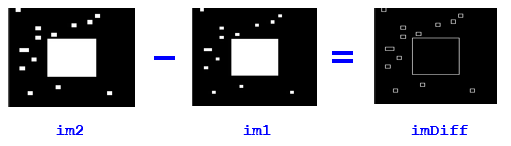

In [ ]:
im1 = imageio.imread('files/erosion_2.png')
im2 = morph_by_neighborhood(im1,dialation, 1, 1)
imDiff = im2 - im1
fig,ax=plt.subplots(1,3)
ax[0].imshow(im1, cmap=plt.cm.gray)
ax[1].imshow(im2, cmap=plt.cm.gray)
ax[2].imshow(imDiff, cmap=plt.cm.gray)

Slides 22-29

## Denoising

### We want to “clean” this pictures from noise. Any suggestions?



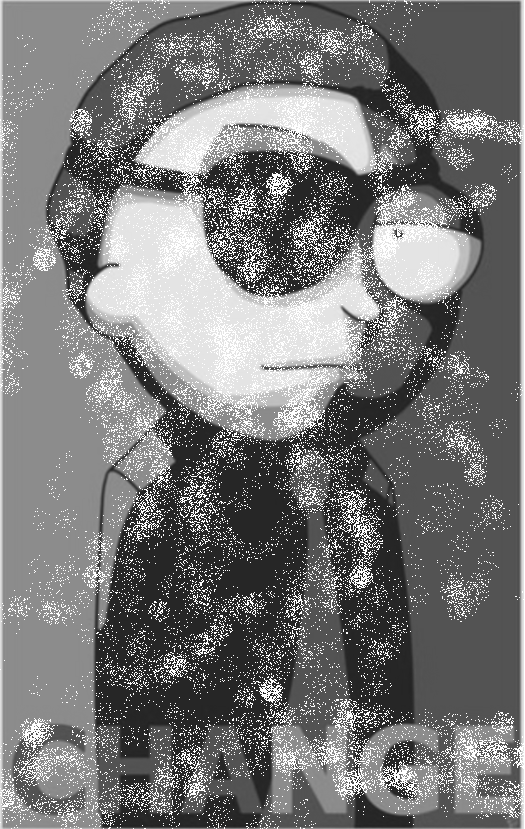

In [ ]:
im = imageio.imread('files/evil_morty_change_noised.png')  

### First attempt: smoothing using `mean`
- Use the morph_by_neighborhood framework with **mean (average)**:

In [ ]:
def denoise_mean(im, dx=5, dy=5):
    return morph_by_neighborhood(im, np.mean, dx, dy) 

In [ ]:
im_transformed=denoise_mean(im)
fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(im_transformed, cmap=plt.cm.gray)

### Second attempt: smoothing using `median`
- Use the morph_by_neighborhood framework with **m (average)**:

In [ ]:
def denoise_median(im, dx=5, dy=5):
    return morph_by_neighborhood(im, np.median, dx, dy)

In [ ]:
im_transformed=denoise_median(im)
fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(im_transformed, cmap=plt.cm.gray)

### Can we do better?

- We did not exploit what we know about the ‘noise’
- The ‘noise’ can only be almost white or almost black
    - **So change only "too" bright or "too" dark pixels!**
    - "too" bright and "too" black are determined by predefined thresholds (W, B, respectively)

### solution outline
- Pixels not too bright or too dark remain with no change.
- Otherwise, examine the pixel’s neighborhood neighborhood.
    - too dark:
        - Get the median of neighborhood, but ignore ‘too dark’ pixels
    - too bright:
        - Get the median of neighborhood, but ignore ‘too bright’ pixels

In [ ]:
def my_median(nbrs, min_val=15, max_val=225):
    good_nbrs = nbrs[(nbrs > min_val) & (nbrs < max_val)]
    if good_nbrs.size>0: #There are relevant neighbors
        return np.median(good_nbrs)
    
    #"else": i.e., no relevant neighbors
    center = (nbrs.shape[0]//2, nbrs.shape[1]//2)
    return nbrs[center]


In [ ]:
def clear_noise(nbrs, min_val=15, max_val=225):
    center = (nbrs.shape[0]//2, nbrs.shape[1]//2)
    if not (min_val < nbrs[center] < max_val): #Abnormal pixel
        return my_median(nbrs, min_val, max_val)

    #"else": i.e., a good one, return it
    return nbrs[center]

In [ ]:
def denoise_bounded_median(im, dx=2, dy=2):
    fig,ax=plt.subplots(1,4, figsize=(50,10))
    ax[0].imshow(im, cmap=plt.cm.gray)
    num_repeats = 3
    for i in range(num_repeats): 
        im = morph_by_neighborhood(im, clear_noise, dx, dy)
        ax[i+1].imshow(im, cmap=plt.cm.gray)
    return im

In [ ]:
denoised_image=denoise_bounded_median(im)

In [ ]:
original_image = imageio.imread('files/evil_morty_change.png') 
fig,ax=plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(original_image, cmap=plt.cm.gray)
ax[1].imshow(denoised_image, cmap=plt.cm.gray)

Slides 30-33

## Ternary segmentation (self-learning)

#### Ternary segmentation – like binary segmentation but with 3 values.

- Transform grayscale to black/gray/white.
- First, find 2 thresholds (e.g, th1, th2) such that:
    - 1/3 pixels turn white     1/3 turn gray     1/3 turn black

- For example: If the values of the image pixels are 1 to 90 then:
    - first th1 = 30; th2 = 60

- Then for each pixel p assign:
    - 0 if  $p \le th1$ 
    - 128 if  $th1<p \le th2$  
    - 255 if  $th2 < p$


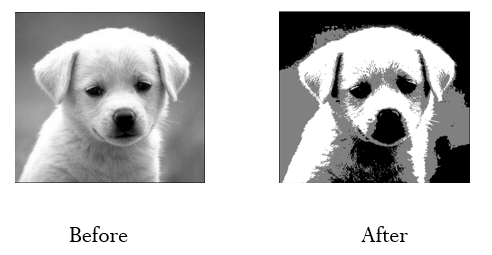


### Solution outline

#### We will break the problem into smaller problems:
- Find 2 thresholds from cumulative histogram.
    - Create a histogram.
    - Create a cumulative histogram.
    - Find the thresholds
- Transform the image using the thresholds.


### Assume we have a `find_thrds(im)` function (we will implement it later, don’t worry).

#### Implement a `ternary_segmentation` function: 
- Input: a grayscale image
- Output: a new image where every pixel has one of 3 gray levels:
	0, 128 or 255

In [ ]:
def ternary_segmentation(im):
    th1, th2 = find_thrds(im)
    newIm = np.tile(0, im.shape)
    newIm[im > th1] = 128
    newIm[im > th2] = 255
    return newIm

Slides 34-39

### Image histogram

#### pic.png contains a 20x20 pixel image
- Each pixel is a gray level in 0..255

#### Implement the function build_hist(im):
- Input: grayscale image.
- Output: histogram of gray levels in image.

#### Our histogram is list with 256 values:
- Index = gray levelm
- Value = number of pixels with that gray level


|||
|--|--|
|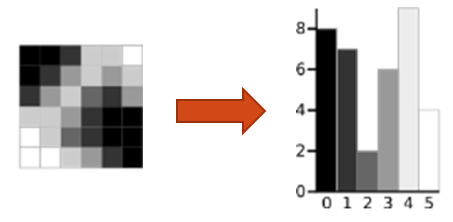|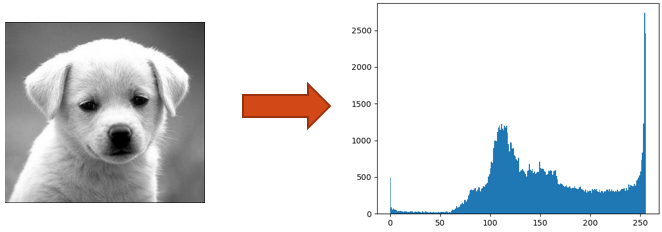|

In [ ]:
def build_hist(im):
    hist = [0]*256
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            gray_level = im[r, c]
            hist[gray_level] += 1
    return hist
    #Same as:
    #return np.bincount(im.flatten())


### Cumulative histogram

|||
|:--|:--|
|
<h4 id="implement-the-function-cumulative_sum">Implement the function cumulative sum(hist):</h4><ul><li>Input: histogram</li><li>Output: list of the cumulative sums of nums</li></ul>|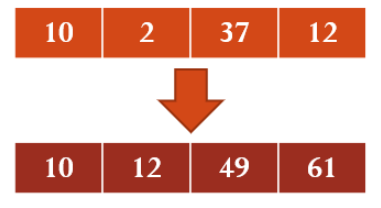
    </td></tr></table>|

In [ ]:
def cumulative_sum(hist):
    if not hist: return []
    result = [hist[0]]
    for i in range(1,len(hist)):
        prev_sum = result[i-1]   
        result.append(prev_sum + hist[i])
    return result

    #Same as:
    #return [sum(hist[:i+1]) for i in range(len(hist))] 
    #Or:    
    #return list(np.cumsum(hist)) 

Slides 38-39

### Finding the thresholds

#### Given an image, find two thresholds th1, th2 such that:

- $\frac{1}{3} $ of all pixels $\le$ th1 $\le \frac{2}{3}$ of all pixels    
- $\frac{2}{3} $ of all pixels $\le$ th2 $\le \frac{1}{3}$ of all pixels 
- In reality, the threshold is approximated by the **minimum value that is greater than the minimal fraction of pixels**


#### Solution: use `histogram` + `cumulative_sum`
- For example: for a 5X5 image with 7 gray levels (0-6):

In [ ]:
hist = [1,5,4,8,3,3,1]
hist_cumulative_sum=cumulative_sum(hist) # [1,6,10,18,21,24,25]
sum_of_pixels=sum(hist)
print(f'histogram: {hist}')
print(f'cumulative histogram {hist_cumulative_sum}')
print(f'{hist_cumulative_sum[1]/sum_of_pixels} < 1/3 < {hist_cumulative_sum[2]/sum_of_pixels} --> th1=2') # th1=2
print(f'{hist_cumulative_sum[2]/sum_of_pixels} < 2/3 < {hist_cumulative_sum[3]/sum_of_pixels} --> th2=3') # th1=3

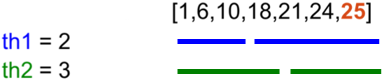

### Implementation of thresholds finding

In [ ]:
def find_thrds(im):
    hist = build_hist(im)
    cum_lst = cumulative_sum(hist)
    i = 0
    while cum_lst[i] / im.size < 1 / 3:
        i += 1
    th1 = i
    while cum_lst[i] / im.size < 2 / 3:
        i += 1
    th2 = i
    return th1, th2
    #Or simply use:
    #return np.percentile(im, 33), np.percentile(im, 66)

In [ ]:
im = imageio.imread('files/evil_morty_segmentation.png') 

In [ ]:
import matplotlib.pyplot as plt 
im1_transformed=ternary_segmentation(im)
fig,ax=plt.subplots()
ax.imshow(im1_transformed, cmap=plt.cm.gray)

Slides 40-43

## Image gradient

- Given an image we may want to locate points of major change in intensity.
- In the gradient image, every pixel is the difference between the corresponding pixel in the original image and a neighboring pixel.
- We can compute the gradient w.r.t. each of the image dimensions.

<table><tr>
<td>
    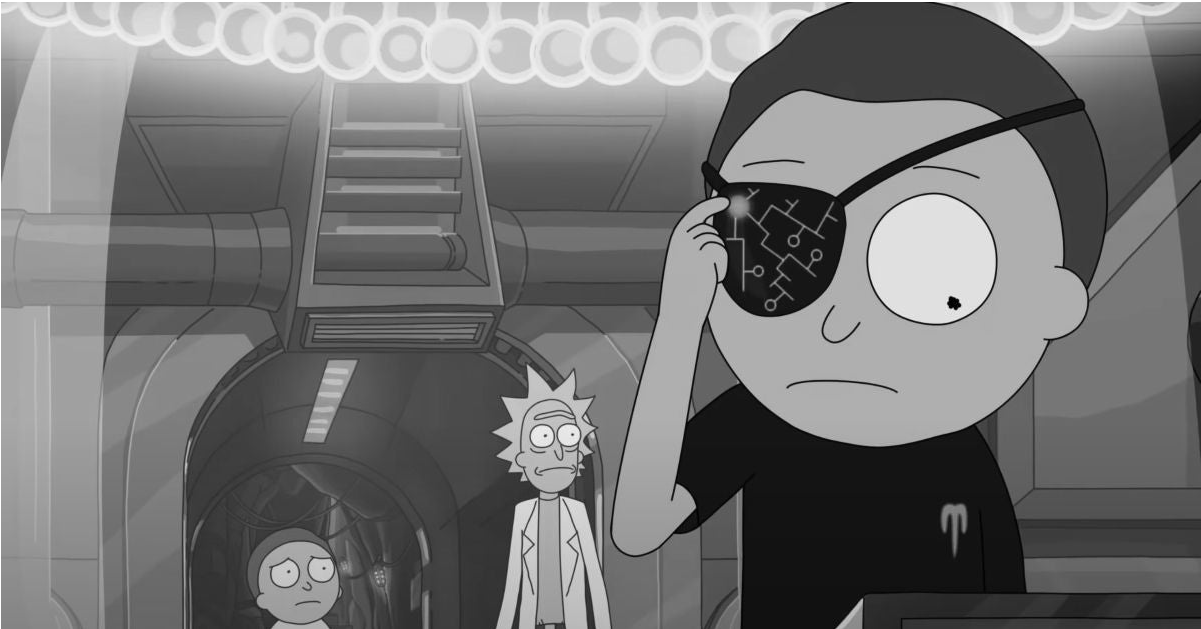
    </td>
<td>
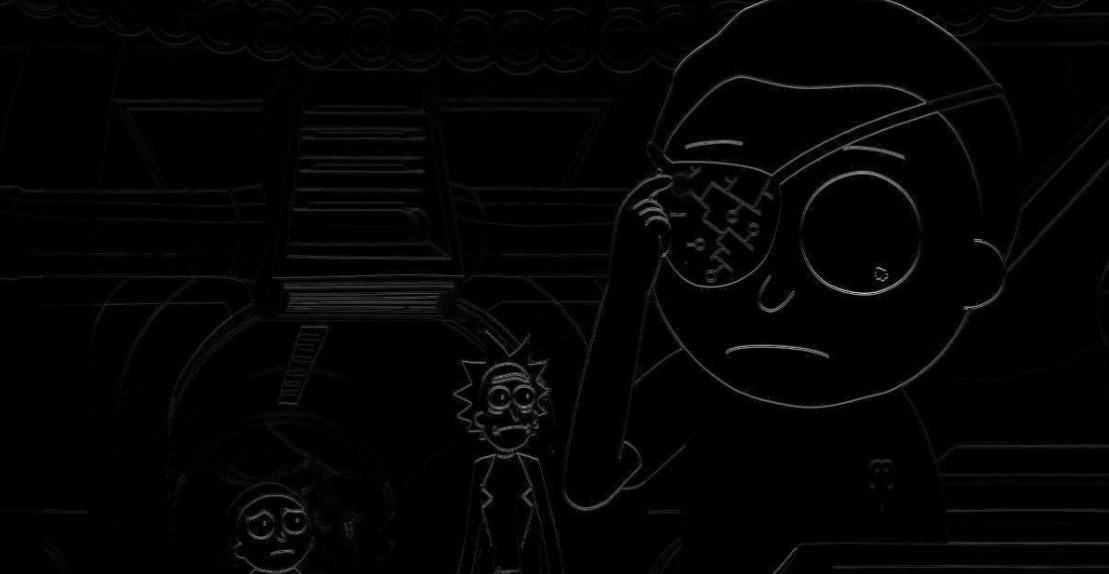
    </td></tr></table>

### How do we create such an image?

#### Shift up and subtract images
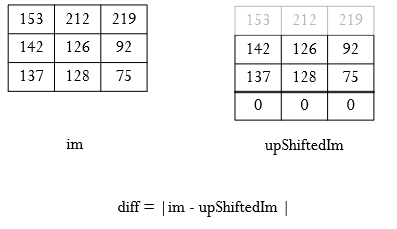


In [ ]:
im = imageio.imread('files/evil_morty_segmentation.png')

In [ ]:
import numpy as np
zeroRow = np.zeros((1,im.shape[1]), dtype=np.int_)
upShiftedIm = np.vstack((im[1:,:], zeroRow))
diff = np.int_(upShiftedIm) - np.int_(im)
abs_diff = np.abs(diff)
plt.figure(figsize=(15,15))
plt.imshow(abs_diff, cmap=plt.cm.gray)

#### Can it also be computed using for loops?

## Brighening an image

#### Problem: We can hardly see the gradient image.
- let’s brighten it.

In [ ]:
brighten_abs_diff = abs_diff * 5
more_than_255 = brighten_abs_diff > 255
brighten_abs_diff[more_than_255] = 255

#Same as: brighten_abs_diff = np.minimum(abs_diff * 5, 255)

fig,ax=plt.subplots(1,3, figsize=(100,40))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(abs_diff, cmap=plt.cm.gray)
ax[2].imshow(brighten_abs_diff, cmap=plt.cm.gray)

Slide 46

## Question from previous exams

[Exam 2023-2024 semester A Moed B](https://courses.cs.tau.ac.il/pyProg/2425a/exams/exam2324a_moedB.pdf)

3.A

In [ ]:
def convert_to_binary(im):
    res = np.zeros(im.shape)
    flt = im.flatten()
    bc = np.bincount(flt)
    am = np.argmax(bc)
    res[im >= am] = 255
    return res


In [ ]:
arr=np.array([[1,2,5],[4,4,3]])
convert_to_binary(arr)

3.B

In [ ]:
def encode_row_helper(im_row):
    im_row_shift=np.hstack((np.array([255]), im_row))
    idxs=np.nonzero(np.diff(im_row_shift))[0]
    return idxs

def encode_row(im_row):
    idxs = encode_row_helper(im_row)
    idx_diff = np.diff(np.hstack((idxs, [len(im_row)])))
    return np.hstack(([idxs[0]],idx_diff))

im_row =[255,0,255,255]
print(encode_row(im_row))

3.C

In [ ]:
def encode(im):
    ar = np.array([])
    for a in range(im.shape[0]):
        ar = np.hstack((ar, encode_row(im[a]), [-1]))
    return ar[:-1]

im_bin=np.array([[0,0,255,255],
[255,0,255,255],
[0,0,255,255]])
encode(im_bin)

3.D

In [ ]:
def calc_ratio(im,im_enc):
    return np.sum(im_enc[im_enc != -1]) / im.size

im=np.array([[0, 1, 2, 3],
             [2, 1, 2, 3],
             [0, 1, 2, 3]])

im_bin = convert_to_binary(im)
im_enc = encode(im_bin)
print(calc_ratio(im_bin,im_enc))

## Numpy: summary

#### Many more operations can be performed on images, in particular:
- Numpy is very convenient library for numerical manipulations
- Can be used for geometric transformations: rotation, flipping, resizing, etc.
- Many application, including image processsing, which we covered thouroughly.